## Entscheidungsbäume

### Aufgabe: Python Implementierung unserer manuellen Arbeit

     Outlook Temperature Humidity    Wind PlayGolf
0      Sunny         Hot     High    Weak       No
1      Sunny         Hot     High  Strong       No
2   Overcast         Hot     High    Weak      Yes
3      Rainy        Mild     High    Weak      Yes
4      Rainy        Cool   Normal    Weak      Yes
5      Rainy        Cool   Normal  Strong       No
6   Overcast        Cool   Normal  Strong      Yes
7      Sunny        Mild     High    Weak       No
8      Sunny        Cool   Normal    Weak      Yes
9      Rainy        Mild   Normal    Weak      Yes
10     Sunny        Mild   Normal  Strong      Yes
11  Overcast        Mild     High  Strong      Yes
12  Overcast         Hot   Normal    Weak      Yes
13     Rainy        Mild     High  Strong       No


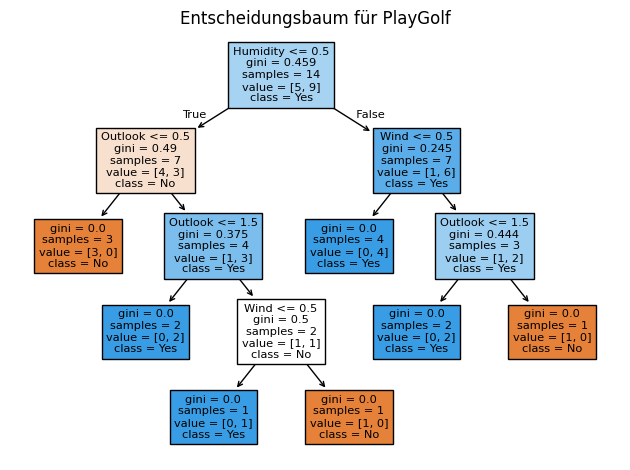

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Einlesen von golf_data.csv
df = pd.read_csv("golf_data.csv", sep=",", encoding="utf-8")
print(df)

# Kategorische Variablen kodieren features (0 = sunny, 1 = overcast, 2 = rainy)
outlook_map = {"Sunny": 0, "Overcast": 1, "Rainy": 2}
temperature_map = {"Hot": 0, "Mild": 1, "Cool": 2}
humidity_map = {"High": 0, "Normal": 1}
wind_map = {"Weak": 0, "Strong": 1}
playGolf_map = {"No": 0, "Yes": 1}

df["Outlook"] = df["Outlook"].map(outlook_map)
df["Temperature"] = df["Temperature"].map(temperature_map)
df["Humidity"] = df["Humidity"].map(humidity_map)
df["Wind"] = df["Wind"].map(wind_map)
df["PlayGolf"] = df["PlayGolf"].map(playGolf_map)

# Manuelles Mappen ist in Zukunft nicht mehr unbedingt notwendig -> Man benötigt dann eine Funktion, die mappt


# Zielvariable und Features setzen
features = ["Outlook", "Temperature", "Humidity", "Wind"]
X = df[features]
y = df["PlayGolf"]


# Entscheidungsbaum erstellen
clf = DecisionTreeClassifier(criterion="gini", random_state=0) #random wird benötigt, falls zwei splits genau gleich sind
clf = clf.fit(X=X, y=y)

# Visualisieren
plot_tree(
    clf,                            # Decision Tree
    feature_names=X.columns,        # Namen der Eingabe‑Features
    class_names=["No", "Yes"],      # Zielklassen
    filled=True,                    # farbige Knoten
    impurity=True,                  # Gini‑Impurity anzeigen
)

plt.title("Entscheidungsbaum für PlayGolf")
plt.tight_layout() #Layout des Entscheidungsbaumes verbessern
plt.show()

### Übungsaufgabe: Klassifizieren mit Entscheidungsbaum

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

Text(0.5, 1.0, 'Confusion matrix')

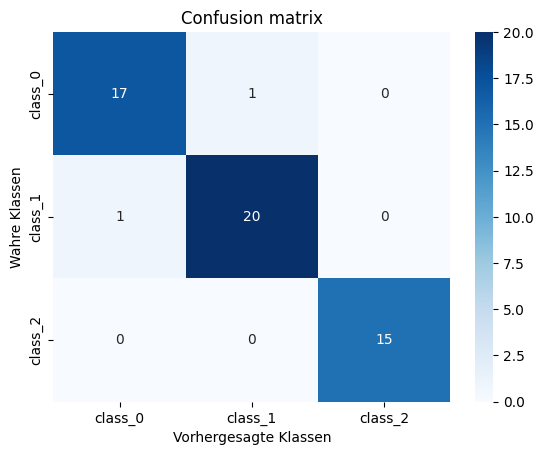

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Wine Datensatz in DataFrame laden
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
print(wine_df.head())

# Trainings- und Testdaten aufteilen
features = ["alcohol", "malic_acid","ash","alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"]
X = wine_df[features]
y = wine_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) #straitify = y -> Verteilung der Klassenausprägung der Training- und Testdaten ist ungefähr gleich

# Entscheidungsbaum erstellen
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X=X_train, y=y_train)

# Modellbewertung
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: "+str(accuracy))
cf_matrix = confusion_matrix(y_test, y_pred)
class_labels = wine_data.target_names  # Klassen-Labels
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels) #Confusion Matrix mit Seaborn ausgeben
plt.xlabel("Vorhergesagte Klassen")
plt.ylabel("Wahre Klassen")
plt.title("Confusion matrix")

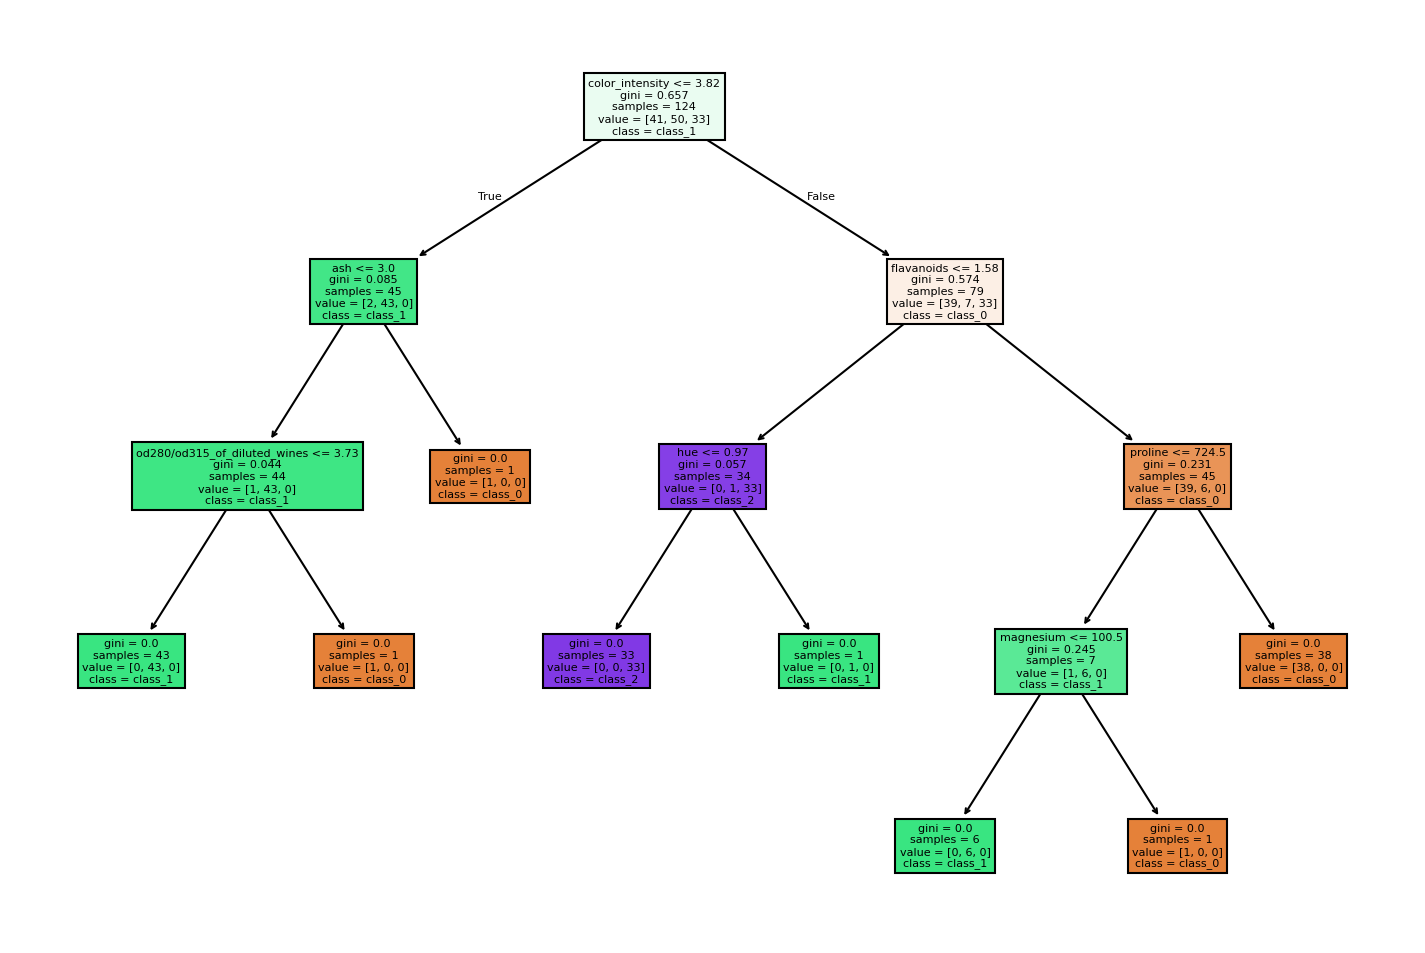

In [ ]:
# Visualisierung des Entscheidungsbaumes
plt.figure(figsize=(12, 8), dpi=150) # Groesse und schaerfe festlegen, damit man alles erkennen kann

plot_tree(
    clf,                            # Decision Tree
    feature_names=X.columns,        # Namen der Eingabe‑Features
    class_names=class_labels,       # Zielklassen
    filled=True,                    # farbige Knoten
    impurity=True,                  # Gini‑Impurity anzeigen
)
plt.show()

### Übungsaufgabe Regression Tree Forecasting (California)

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Daten laden und analysieren
california_housing_data = fetch_california_housing(as_frame=True)
print(california_housing_data.frame)

X = california_housing_data.data
y = california_housing_data.target

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

# Regressionsbaum erstellen
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X=X_train, y=y_train)

y_pred = regressor.predict(X_test)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("R-squared: "+ str(r2) + "\n" + "MSE: "+ str(mse))


# Cross‑Validation anwenden
cv_scores = cross_val_score(estimator=DecisionTreeRegressor(random_state=42),X=X_train,y=y_train,cv=5,scoring='neg_mean_squared_error')

print("Cross-Validation MSE Werte:" + str(-cv_scores))
print("Cross-Validation durschnittlicher MSE: " + str(-cv_scores.mean()))


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      